In [1]:
import pandas as pd

# Load the CSV file to inspect the contents
file_path = 'final_data.csv'
df = pd.read_csv(file_path)

# Display the first few rows and basic information about the data
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   track_name              665 non-null    object 
 1   artist(s)_name          665 non-null    object 
 2   artist_count            665 non-null    int64  
 3   released_year           665 non-null    int64  
 4   released_month          665 non-null    int64  
 5   released_day            665 non-null    int64  
 6   in_spotify_playlists    665 non-null    int64  
 7   in_spotify_charts       665 non-null    int64  
 8   streams                 665 non-null    int64  
 9   in_apple_playlists      665 non-null    int64  
 10  in_apple_charts         665 non-null    int64  
 11  bpm                     665 non-null    int64  
 12  mode                    665 non-null    object 
 13  danceability_%          665 non-null    int64  
 14  valence_%               665 non-null    in

(                            track_name    artist(s)_name  artist_count  \
 0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
 1                                 LALA       Myke Towers             1   
 2                              vampire    Olivia Rodrigo             1   
 3                         Cruel Summer      Taylor Swift             1   
 4                       WHERE SHE GOES         Bad Bunny             1   
 
    released_year  released_month  released_day  in_spotify_playlists  \
 0           2023               7            14                   553   
 1           2023               3            23                  1474   
 2           2023               6            30                  1397   
 3           2019               8            23                  7858   
 4           2023               5            18                  3133   
 
    in_spotify_charts    streams  in_apple_playlists  ...  Track Score  \
 0                147  141381703  

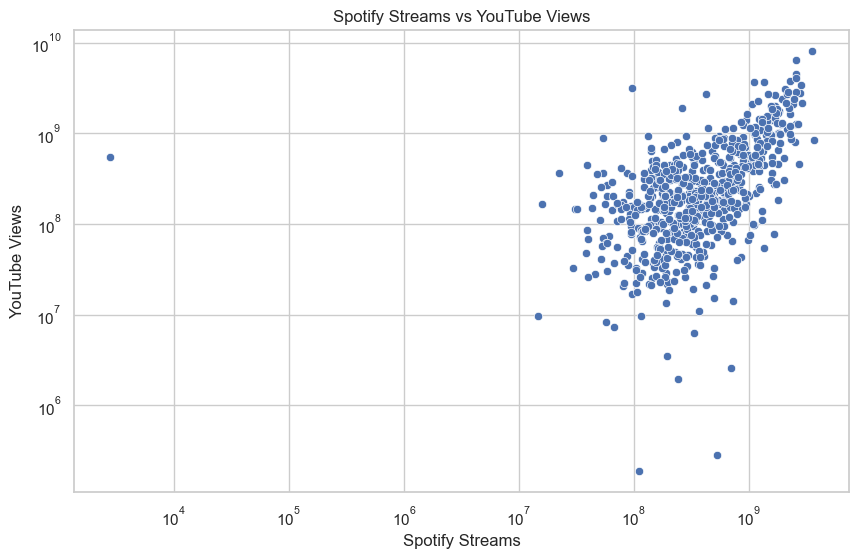

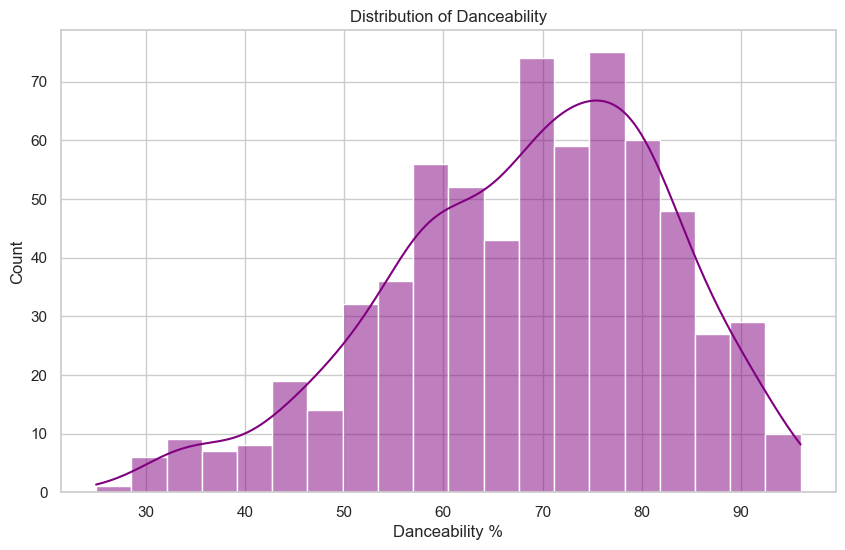

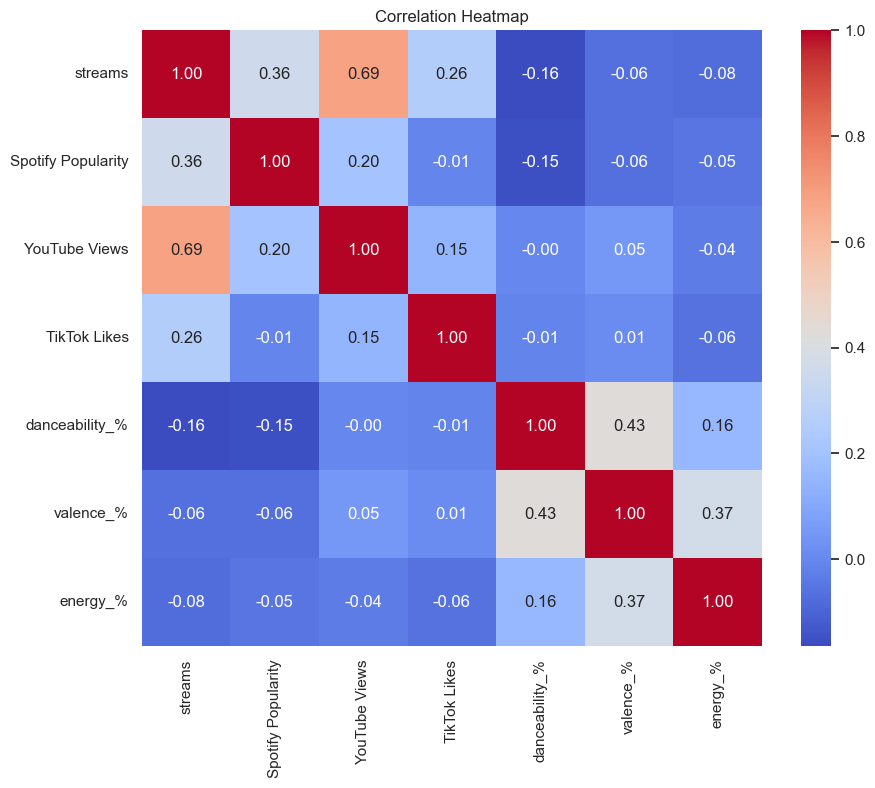

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Relationship between Spotify Streams and YouTube Views
plt.figure(figsize=(10, 6))
sns.scatterplot(x='streams', y='YouTube Views', data=df)
plt.title('Spotify Streams vs YouTube Views')
plt.xlabel('Spotify Streams')
plt.ylabel('YouTube Views')
plt.xscale('log')
plt.yscale('log')

# Plot 2: Distribution of Danceability
plt.figure(figsize=(10, 6))
sns.histplot(df['danceability_%'], bins=20, kde=True, color='purple')
plt.title('Distribution of Danceability')
plt.xlabel('Danceability %')
plt.ylabel('Count')

# Plot 3: Correlation heatmap for selected columns
selected_columns = ['streams', 'Spotify Popularity', 'YouTube Views', 'TikTok Likes', 'danceability_%', 'valence_%', 'energy_%']
correlation = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')

# Show the plots
plt.show()


C:\Users\asus\AppData\Local\Temp\ipykernel_8804\786412326.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Spotify Popularity', y='track_name', data=top_popular_songs, palette='viridis')


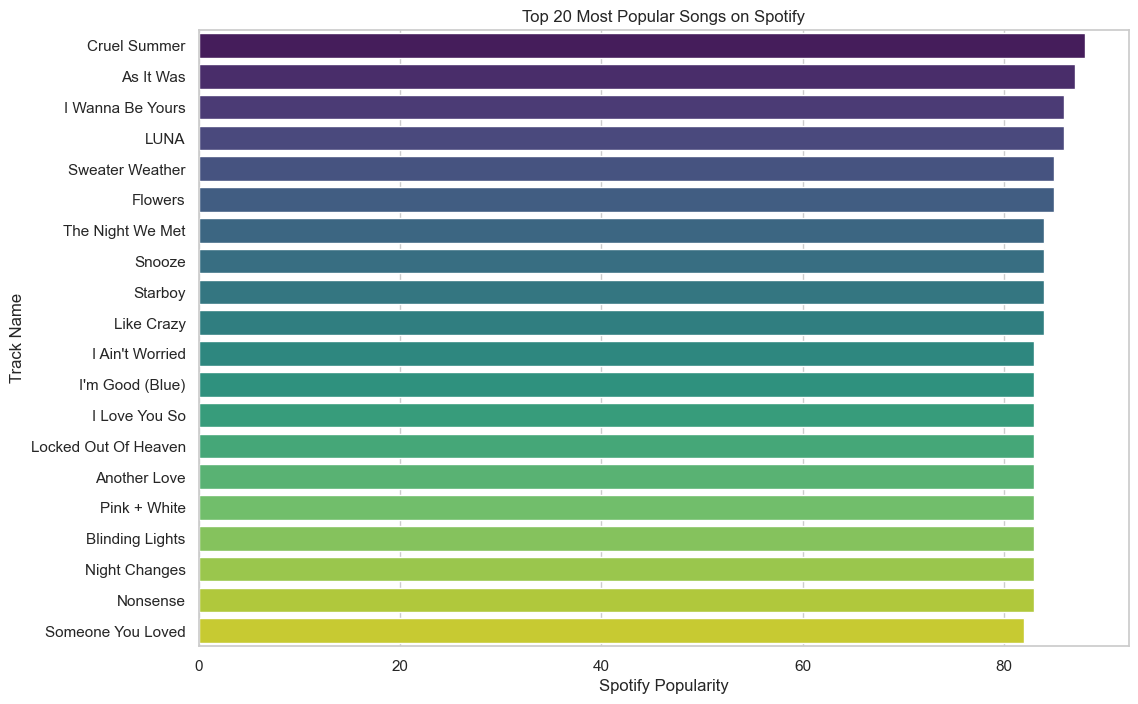

In [3]:
# Sort by Spotify Popularity and take the top 20
top_popular_songs = df.sort_values(by='Spotify Popularity', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='Spotify Popularity', y='track_name', data=top_popular_songs, palette='viridis')
plt.title('Top 20 Most Popular Songs on Spotify')
plt.xlabel('Spotify Popularity')
plt.ylabel('Track Name')

plt.show()


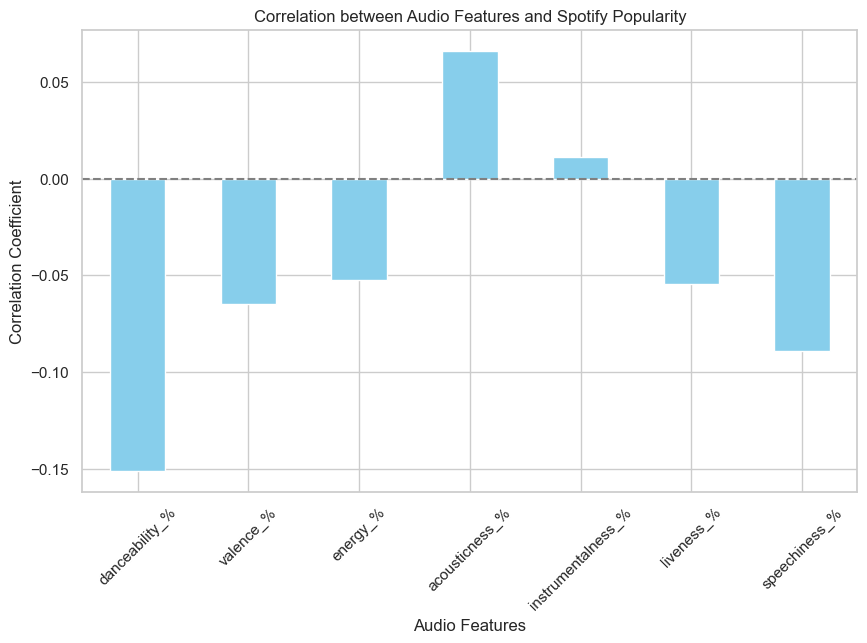

danceability_%       -0.151151
valence_%            -0.064638
energy_%             -0.052290
acousticness_%        0.066220
instrumentalness_%    0.011155
liveness_%           -0.054386
speechiness_%        -0.089021
Name: Spotify Popularity, dtype: float64

In [4]:
# Calculate correlation between audio features and Spotify Popularity

# Select relevant columns for correlation
audio_features = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
correlation_audio_popularity = df[audio_features + ['Spotify Popularity']].corr()

# Extract correlation of audio features with Spotify Popularity
spotify_popularity_corr = correlation_audio_popularity['Spotify Popularity'].drop('Spotify Popularity')

# Plot the correlations
plt.figure(figsize=(10, 6))
spotify_popularity_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation between Audio Features and Spotify Popularity')
plt.xlabel('Audio Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# Display the correlation values
spotify_popularity_corr


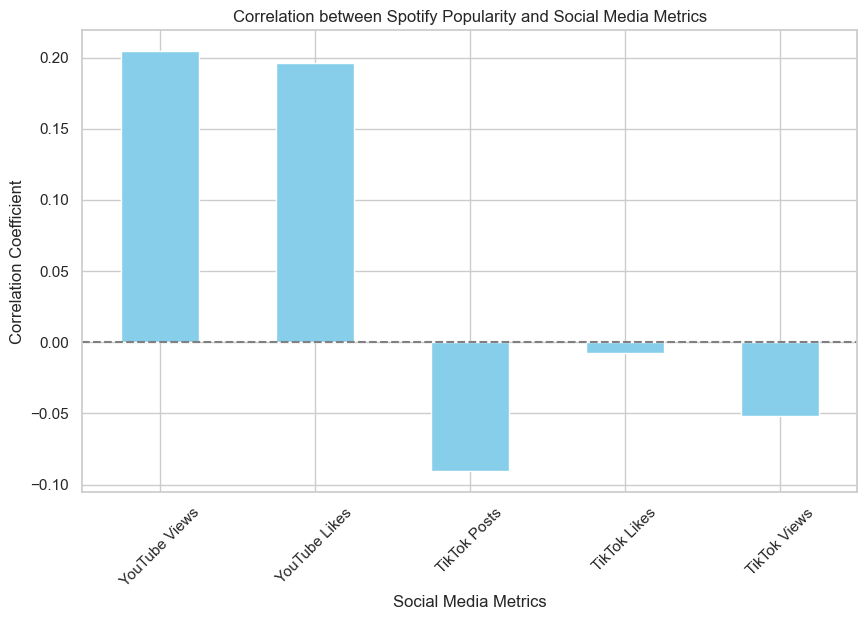

YouTube Views    0.204338
YouTube Likes    0.196419
TikTok Posts    -0.090695
TikTok Likes    -0.007268
TikTok Views    -0.051780
Name: Spotify Popularity, dtype: float64


In [5]:
# Select social media metrics and Spotify Popularity
social_media_metrics = ['YouTube Views', 'YouTube Likes', 'TikTok Posts', 'TikTok Likes', 'TikTok Views']
metrics = social_media_metrics + ['Spotify Popularity']

# Compute the correlation matrix
correlation_social_media = df[metrics].corr()

# Extract the correlations with Spotify Popularity
spotify_social_corr = correlation_social_media['Spotify Popularity'].drop('Spotify Popularity')

# Plot the correlations
plt.figure(figsize=(10, 6))
spotify_social_corr.plot(kind='bar', color='skyblue')
plt.title('Correlation between Spotify Popularity and Social Media Metrics')
plt.xlabel('Social Media Metrics')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# Print correlation values
print(spotify_social_corr)


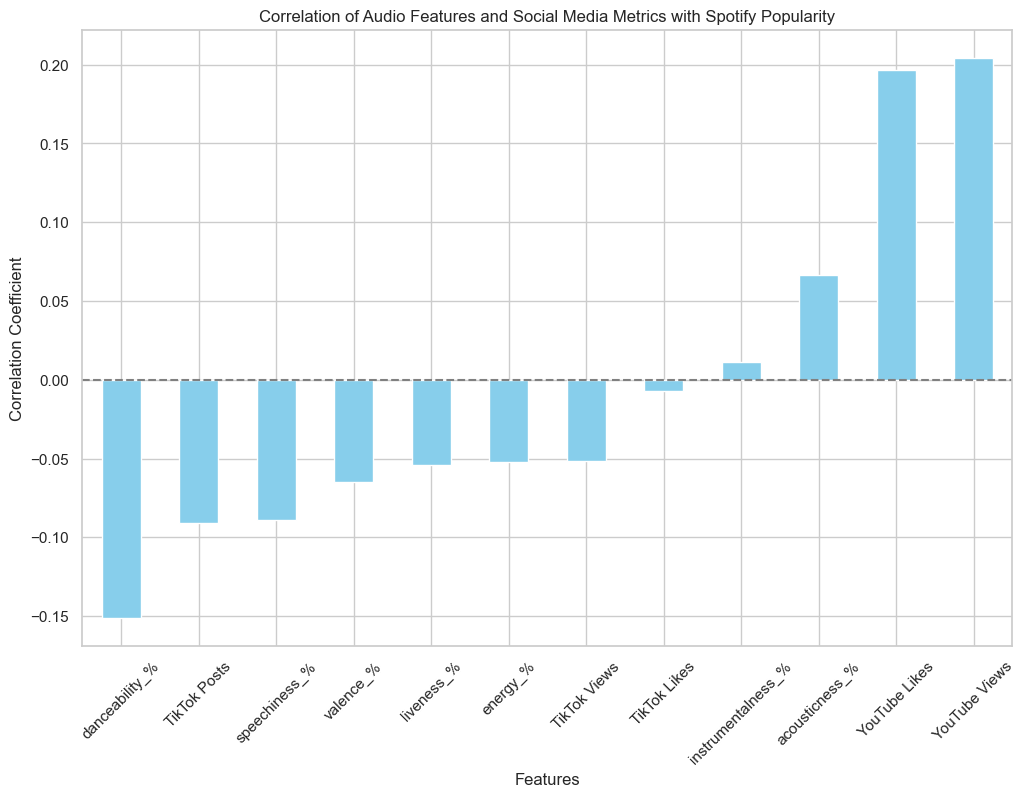

danceability_%       -0.151151
valence_%            -0.064638
energy_%             -0.052290
acousticness_%        0.066220
instrumentalness_%    0.011155
liveness_%           -0.054386
speechiness_%        -0.089021
YouTube Views         0.204338
YouTube Likes         0.196419
TikTok Posts         -0.090695
TikTok Likes         -0.007268
TikTok Views         -0.051780
Name: Spotify Popularity, dtype: float64


In [6]:
# Combine both sets of features with Spotify Popularity
combined_features = audio_features + social_media_metrics + ['Spotify Popularity']

# Compute the correlation matrix
combined_correlation = df[combined_features].corr()

# Extract correlations with Spotify Popularity
popularity_correlation = combined_correlation['Spotify Popularity'].drop('Spotify Popularity')

# Plot the correlations
plt.figure(figsize=(12, 8))
popularity_correlation.sort_values().plot(kind='bar', color='skyblue')
plt.title('Correlation of Audio Features and Social Media Metrics with Spotify Popularity')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.show()

# Print correlation values
print(popularity_correlation)

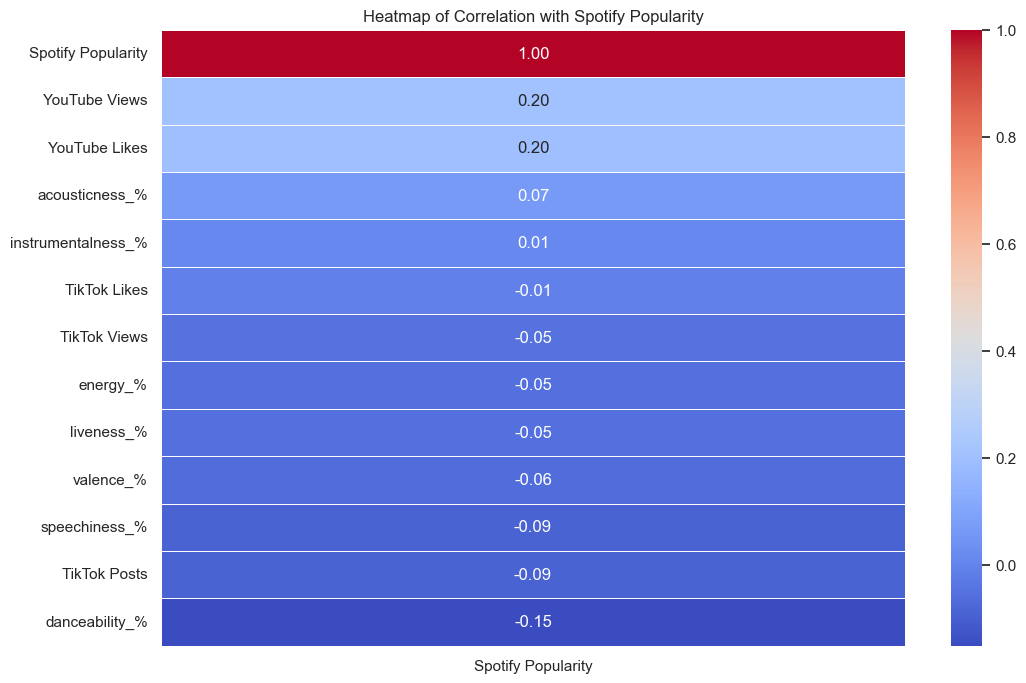

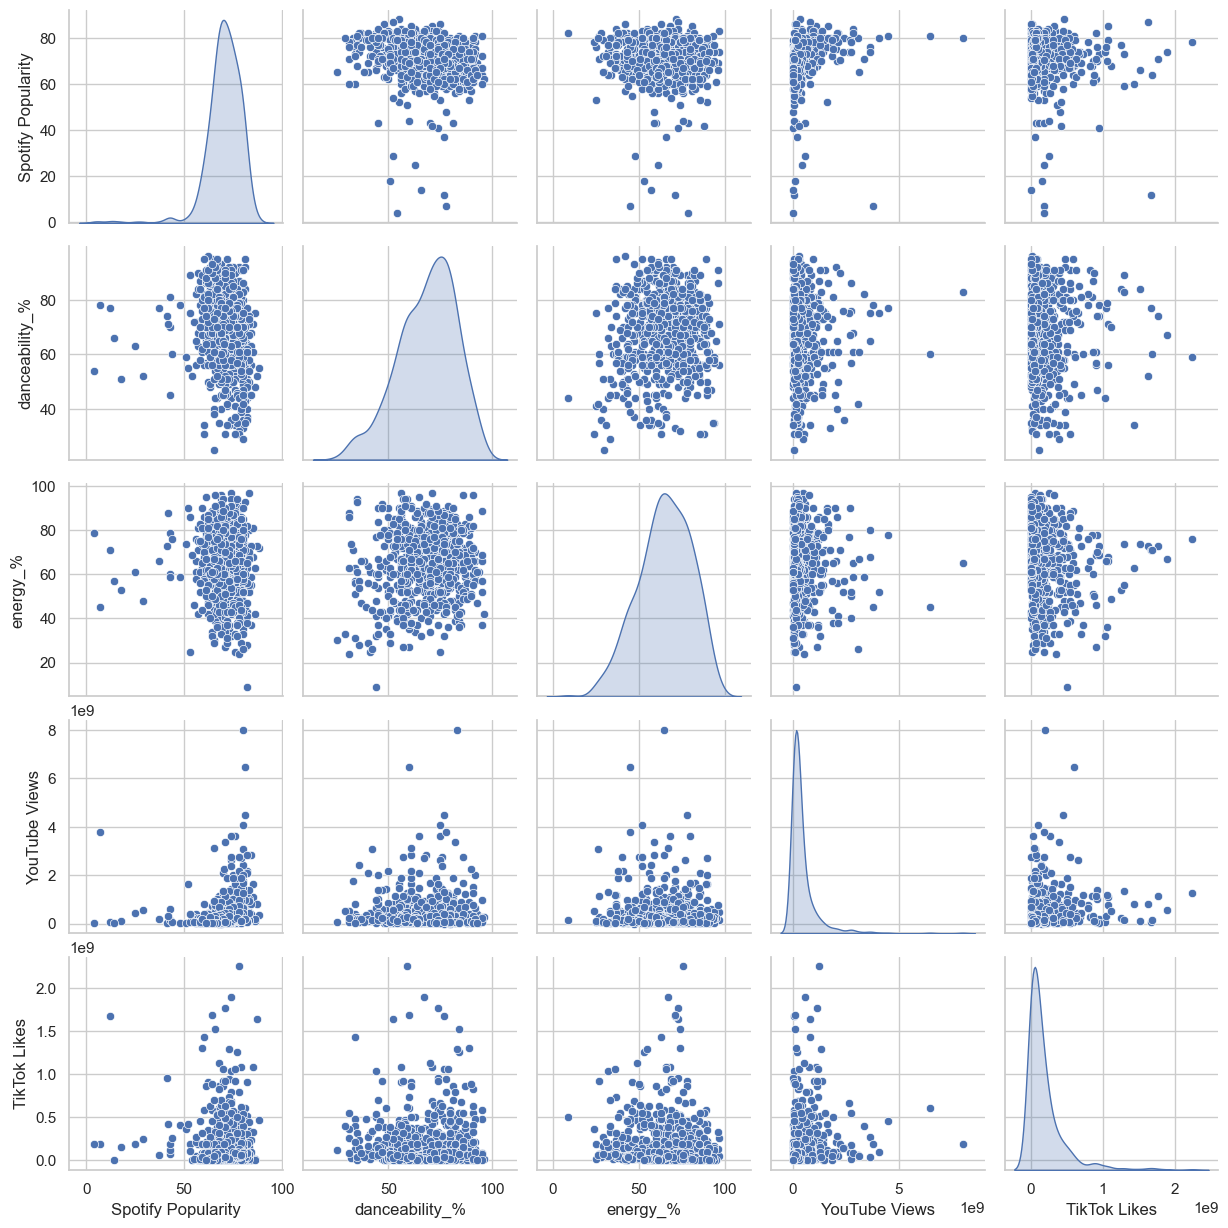

C:\Users\asus\AppData\Local\Temp\ipykernel_8804\2386360834.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')


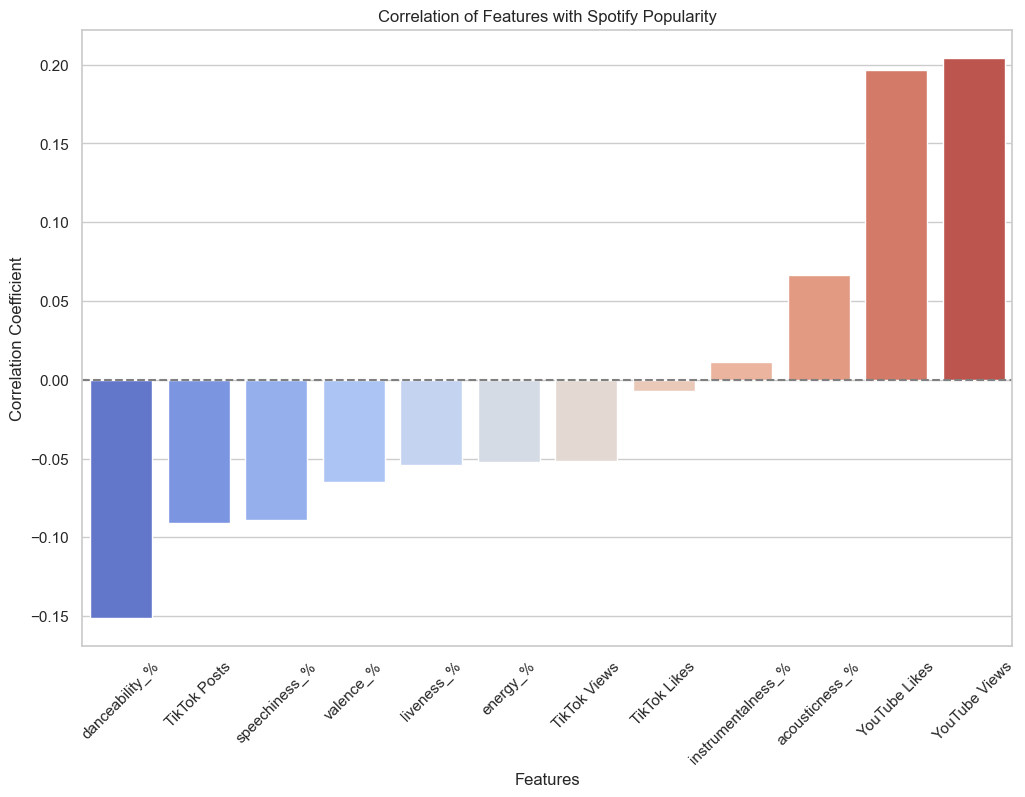

In [7]:
# Compute the correlation matrix
correlation_matrix = df[combined_features].corr()

# 1. Heatmap for Correlation with Spotify Popularity
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['Spotify Popularity']].sort_values(by='Spotify Popularity', ascending=False), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation with Spotify Popularity')
plt.show()

# 2. Pair Plot for Selected Features
selected_features = ['Spotify Popularity', 'danceability_%', 'energy_%', 'YouTube Views', 'TikTok Likes']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.show()

# 3. Correlation Bar Plot with Color Coding
correlations = correlation_matrix['Spotify Popularity'].drop('Spotify Popularity').sort_values()
plt.figure(figsize=(12, 8))
sns.barplot(x=correlations.index, y=correlations.values, palette='coolwarm')
plt.title('Correlation of Features with Spotify Popularity')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.axhline(0, color='gray', linestyle='--')
plt.xticks(rotation=45)
plt.show()
